In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
plt.style.use('fivethirtyeight')

In [2]:
def convert_raw_data(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Open'] = dataframe['Open'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe['Price'] = dataframe['Price'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe['High'] = dataframe['High'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe['Low'] = dataframe['Low'].replace({',': ''}, regex=True).apply(pd.to_numeric)
    dataframe = dataframe.sort_values(by='Date', ascending=True).reset_index(drop=True)
    return dataframe

In [3]:
def create_weekdays_december_january_dataframe():
    start_date = datetime(2023, 12, 16)
    end_date = datetime(2024, 1, 31)
    date_range = pd.date_range(start_date, end_date)
    df = pd.DataFrame({"Date": date_range})
    df = df[(df["Date"].dt.dayofweek != 5) & (df["Date"].dt.dayofweek != 6)]
    new_df = pd.DataFrame({"Date": df["Date"].dt.strftime('%Y-%m-%d')})
    new_df = new_df.head(30)
    return new_df

In [4]:
df = pd.read_csv('HNX.csv')
df = convert_raw_data(df)
df.index = df.pop('Date')
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-04,54.79,53.82,54.88,53.26,0.31K,1.80%
2010-01-05,54.45,55.05,55.22,54.07,0.36K,-0.62%
2010-01-06,54.22,54.35,54.56,52.97,0.36K,-0.42%
2010-01-07,53.33,54.18,54.80,53.21,0.28K,-1.64%
2010-01-08,51.82,52.98,53.27,51.60,0.24K,-2.83%
...,...,...,...,...,...,...
2023-12-11,85.48,85.71,86.08,85.18,25.89K,-0.27%
2023-12-12,85.35,85.49,85.68,85.06,23.24K,-0.15%
2023-12-13,85.09,85.36,85.55,84.51,42.11K,-0.30%


In [5]:
data = df.filter(['Open'])

#convert data to numpy array
dataset = data.values
ratio = 0.7
#get  number of rows to train the model
train_data_len = math.ceil(len(dataset) * ratio)
test_data = df[train_data_len:]
test_data = test_data['Open']

In [6]:
#Scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [7]:
#create training dataset

train_data = scaled_data[0:train_data_len, :]
test_data = scaled_data[train_data_len:, :]
#split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.25701079, 0.26964561, 0.26245506, 0.26070878, 0.24838213,
       0.23677452, 0.23626091, 0.23174114, 0.24550591, 0.25208012,
       0.25721623, 0.24571135, 0.24982024, 0.24365691, 0.23163842,
       0.23800719, 0.23872625, 0.24324602, 0.24191063, 0.23769902,
       0.24673857, 0.2482794 , 0.24530046, 0.24324602, 0.24550591,
       0.24509502, 0.22105804, 0.22537237, 0.22485876, 0.22958398,
       0.22958398, 0.23461736, 0.25834617, 0.23554186, 0.21848998,
       0.20564972, 0.18664612, 0.18448896, 0.18952234, 0.18993323,
       0.17164869, 0.1846944 , 0.17801746, 0.17134052, 0.15665126,
       0.14514638, 0.15048793, 0.14904982, 0.15942476, 0.16096559,
       0.16476631, 0.15439137, 0.17082691, 0.17596302, 0.17236775,
       0.15644581, 0.15911659, 0.17853107, 0.17904468, 0.16610169])]
[0.17298407806882382]

[array([0.25701079, 0.26964561, 0.26245506, 0.26070878, 0.24838213,
       0.23677452, 0.23626091, 0.23174114, 0.24550591, 0.25208012,
       0.25721623, 0.24571135, 0.24

In [8]:
# convert x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(x_train)

In [9]:
#reshape
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2379, 60, 1)

# LSTM modal

In [10]:
model = Sequential()
#first layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#second layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2379/2379 [==============================] - 40s 16ms/step - loss: 0.0041


In [13]:
#create testing dataset

test_data = scaled_data[train_data_len - 60: , :]
#created data sets x_test and y_test

x_test = []
y_test = dataset[train_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#convert x_test to numby array
x_test = np.array((x_test))


In [15]:
#reshape data from 2D to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [16]:
#get predicted value for test dataset

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

33/33 [==============================] - 1s 10ms/step


# Evaluate model


In [17]:
mae = mean_absolute_error( y_test, predictions)
mse = mean_squared_error( y_test, predictions)
mape = mean_absolute_percentage_error( y_test, predictions)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print('Ratio', ratio)

MAE: 6.263402132901278
MSE: 104.24345396798208
RMSE: 10.209968362731692
MAPE: 0.06766171503073179
Ratio 0.7


C:\Users\PH315-52\AppData\Local\Temp\ipykernel_18060\782659118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


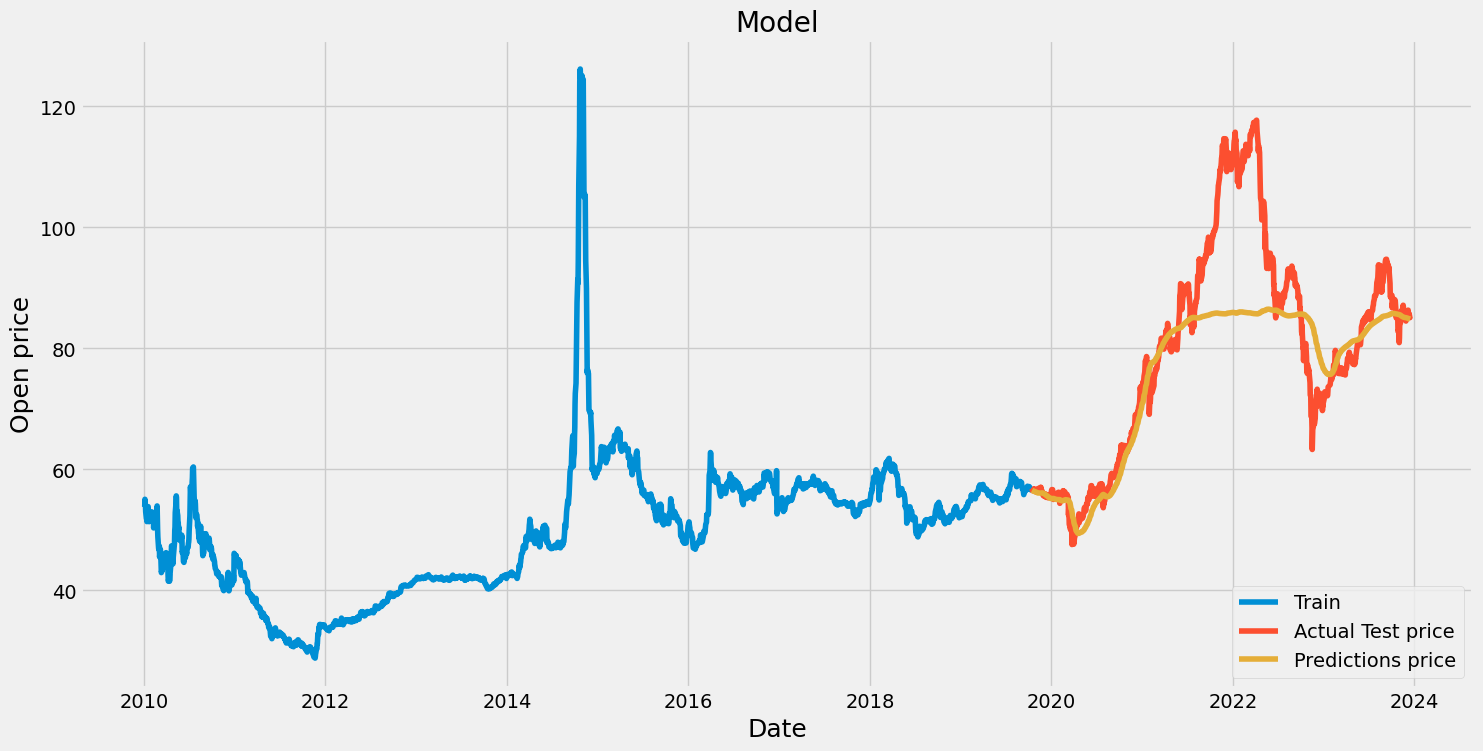

In [18]:
#plot prediected testing data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open price', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Actual Test price', 'Predictions price'], loc='lower right')
plt.show()

# predict future 30 days

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step=60
X_test, ytest = create_dataset(y_test, time_step)

In [21]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):

        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


In [23]:
actual_predict = scaler.inverse_transform(lst_output)

In [24]:
predicted_date = create_weekdays_december_january_dataframe()

future_30_days_df = pd.DataFrame(actual_predict, index=predicted_date["Date"], columns=["Open"])
future_30_days_df.index = pd.to_datetime(future_30_days_df.index)

C:\Users\PH315-52\AppData\Local\Temp\ipykernel_18060\3644335213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


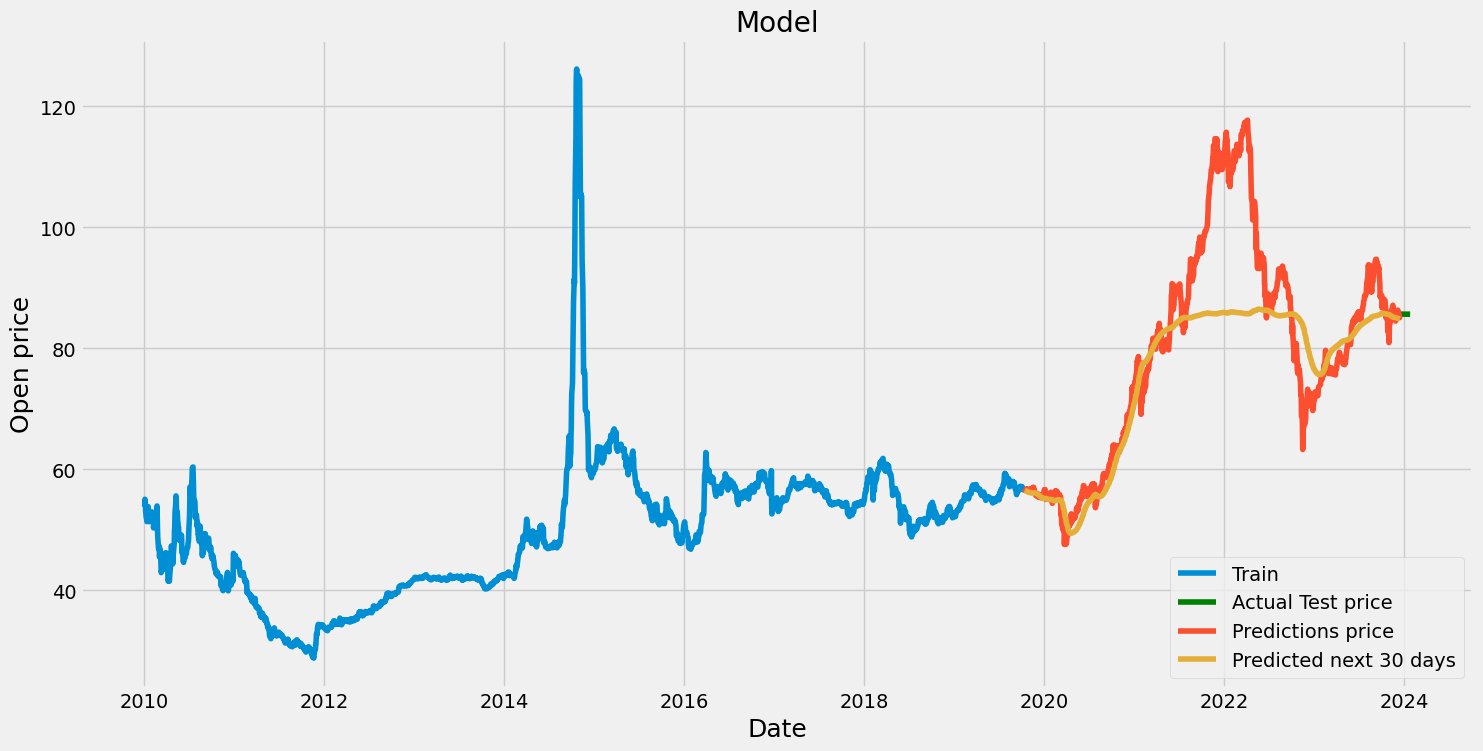

In [25]:
#plot prediected testing data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open price', fontsize=18)
plt.plot(train['Open'])
plt.plot(future_30_days_df['Open'], label='Predicted next 30 days', color = 'green')
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Actual Test price', 'Predictions price', 'Predicted next 30 days'], loc='lower right')
plt.show()